## **Employee Salary Predition** ##

The objective of this project is to predict the grades of the students based on some features

### **Data Collection** ###

In [23]:
df2 = pd.read_csv("/salary_data.csv")
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### **Exploratory Data Analysis** ###

In [24]:
df2.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [25]:
df2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### **Data Preprocessing** ###

#### **1.Find Null vakues** ####

In [26]:
df2.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [27]:
df2.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### **2.Feature Extraction** ####

In [28]:
x = df2['YearsExperience']
y = df2['Salary']

#### **3.Data visualization** ####

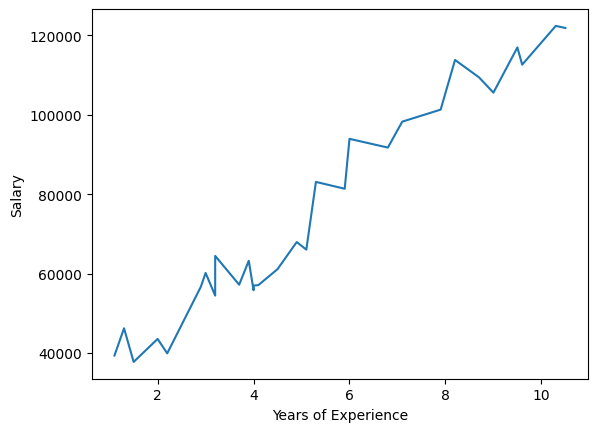

In [29]:
plt.plot(x,y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

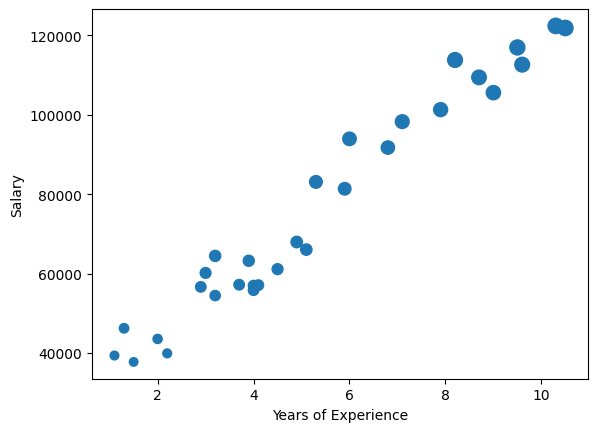

In [30]:
plt.scatter(x,y,s=y/1000)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


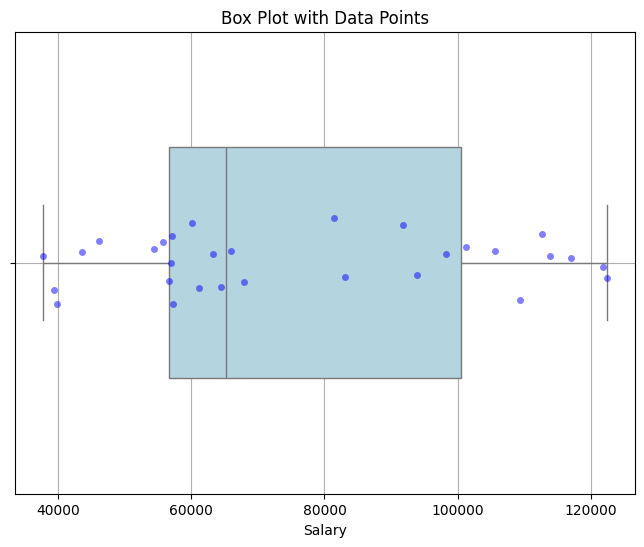

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Salary', data=df2, orient='v', width=0.5, color='lightblue')

sns.stripplot(x='Salary', data=df2, jitter=True, alpha=0.5, color='blue')

plt.title('Box Plot with Data Points')
plt.xlabel('Salary')
plt.grid(True)
plt.show()


#### **4.Outlier Detection** ####

In [34]:
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

df2 = df2[(df2['Salary']>lower_bound) & (df2['Salary']<upper_bound)]
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### **5.Train-test split** ####

In [35]:
x = df2[['YearsExperience']]
y = df2['Salary']

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=21)


### **Model Implementation** ###

#### **Creation and Training** ####

In [36]:

model2 = LinearRegression()
model2.fit(train_x,train_y)

predictions = model2.predict(test_x)
predictions

array([ 51683.73508963, 101539.89662592,  98717.84974651, 121294.22478181,
        36632.81839943,  91192.39140141,  80844.88617689,  54505.78196904,
       114709.44872984])

#### **Evaluation** ####

In [37]:
test_accuracy = model2.score(test_x,test_y)
train_accuracy = model2.score(train_x,train_y)
print("Train accuracy = ",train_accuracy,"test accuracy = ",test_accuracy)

Train accuracy =  0.9604266612005813 test accuracy =  0.9244145228524281


### **conclusion** ###
since the Years of experience and Salary are linearly related ,the Linear Regression model has given high accuracy which is 0.96